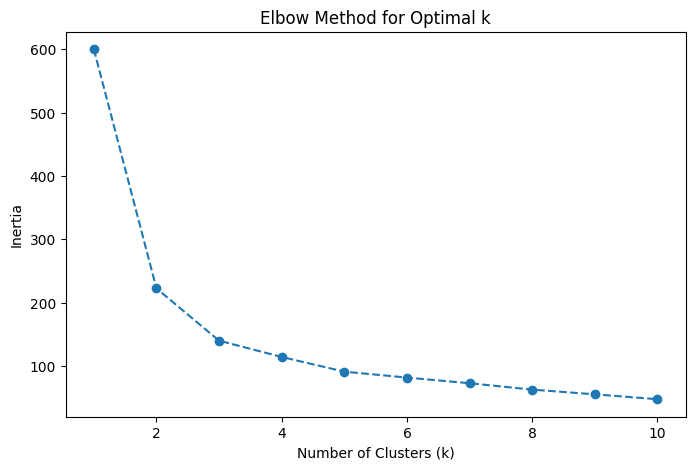

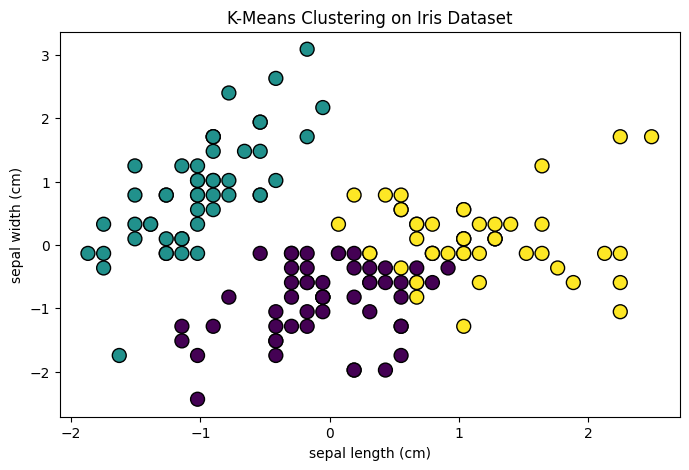

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading the Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Standardizing the dataset
scaler = StandardScaler()
X = scaler.fit_transform(df)

# Finding the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Applying K-Means with optimal k (assuming k=3 from the Elbow Method)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)
labels = kmeans.labels_

# Adding cluster labels to the DataFrame
df['Cluster'] = labels

# Visualizing the clusters (Using first two features)
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', s=100)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title('K-Means Clustering on Iris Dataset')
plt.show()